1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [3]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats


historic_average = 6.3
n = 15

prob_under_15 = stats.poisson.cdf(n - 1, historic_average)
prob_15_or_more = 1 - prob_under_15

print("Probability of observing 15 or more hurricanes:", prob_15_or_more)
print("In % :", prob_15_or_more*100)


Probability of observing 15 or more hurricanes: 0.002217122790073134
In % : 0.22171227900731338


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [4]:
print("Hypthesis: no significant change with light (5% test)")

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

differences = post - pre
mean_diff = np.mean(differences)

#sigma
std1 = np.std(pre, ddof=1)
std2 = np.std(post, ddof=1)
sigma = np.sqrt((std1**2 + std2**2)/2)

#T-test
n = len(pre)
t_test = mean_diff / (sigma * np.sqrt(2/n))
degrees_of_freedom = n - 1

p_value = 2 * (1 - stats.t.cdf(np.abs(t_test), df=degrees_of_freedom))

print("t-test:", t_test)
print("p-value:", p_value)

#5% test
alpha = 0.05
if p_value < alpha:
    print("The change in blood pressures is statistically significant, we reject the null hypothesis.")
else:
    print("There is no statistically significant change in blood pressures, we reject the null hypothesis.")


Hypthesis: no significant change with light (5% test)
t-test: 3.786997938137628
p-value: 0.004302464132864614
The change in blood pressures is statistically significant, we reject the null hypothesis.


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

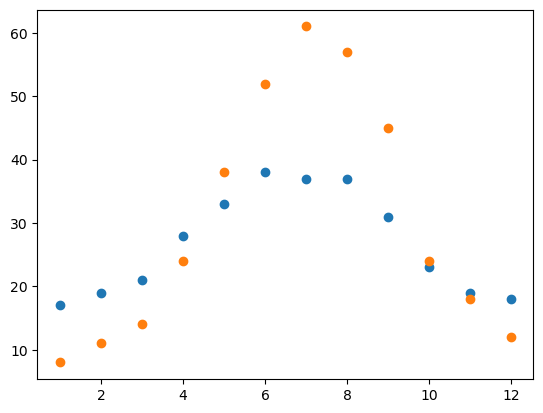

parameters:
 [36.7814773   0.23078568]
covariance matrix:
 [[2.23907740e+00 2.67546870e-03]
 [2.67546870e-03 3.78530795e-05]]
A = 36.78 +- 1.50
f = 0.23 +- 0.01
parameters:
 [45.72737382  0.23431342]
covariance matrix:
 [[1.86843035e+01 1.73334788e-02]
 [1.73334788e-02 1.92368191e-04]]
A = 45.73 +- 4.32
f = 0.23 +- 0.01
I used Sin to fit the data because it starts again after 12 months: The fit is quite good for max temperatures but not really for min temperatures as the curve should be amplified and have frequency higher
The offset is almost the same


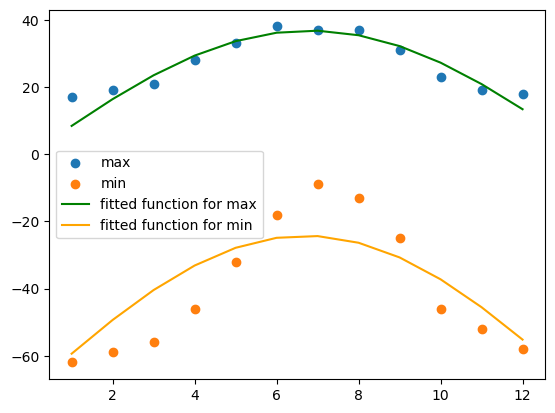

In [5]:
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit


months = np.arange(1, 13)
max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
min = min + 70
def f(x, amp, nu):
    return amp * np.sin(nu * x)

#def f(x,a,b):
   # return a+b*x**2

plt.scatter(months, max, label='max')
plt.scatter(months, min, label='min')
plt.show()

popt,pcov = optimize.curve_fit(f, months, max, p0=[0.1, 0.1], full_output=False)
print("parameters:\n", popt)
print("covariance matrix:\n", pcov)
print("A = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("f = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))

popt2,pcov2 = optimize.curve_fit(f, months, min, p0=[0.1,0.1], full_output=False)
print("parameters:\n", popt2)
print("covariance matrix:\n", pcov2)
print("A = %.2f +- %.2f" % (popt2[0], np.sqrt(pcov2[0,0])))
print("f = %.2f +- %.2f" % (popt2[1], np.sqrt(pcov2[1,1])))

plt.scatter(months, max, label='max')
plt.scatter(months, min-70, label='min')
plt.plot(months, f(months, popt[0], popt[1]), color='green', label='fitted function for max')
plt.plot(months, f(months, popt2[0], popt2[1])-70, color='orange', label='fitted function for min')
plt.legend(loc='best')

print("I used Sin to fit the data because it starts again after 12 months: The fit is quite good for max temperatures but not really for min temperatures as the curve should be amplified and have frequency higher")
print("The offset is almost the same")

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

In [7]:
import pandas as pd
import seaborn as sns
import pickle

pathfile = 'data/residuals_261.pkl'
df = pd.read_pickle(pathfile)
print(df)

#plt.plot(df[residuals])
#plt.show
print("Doesn't work")

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}
Doesn't work


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

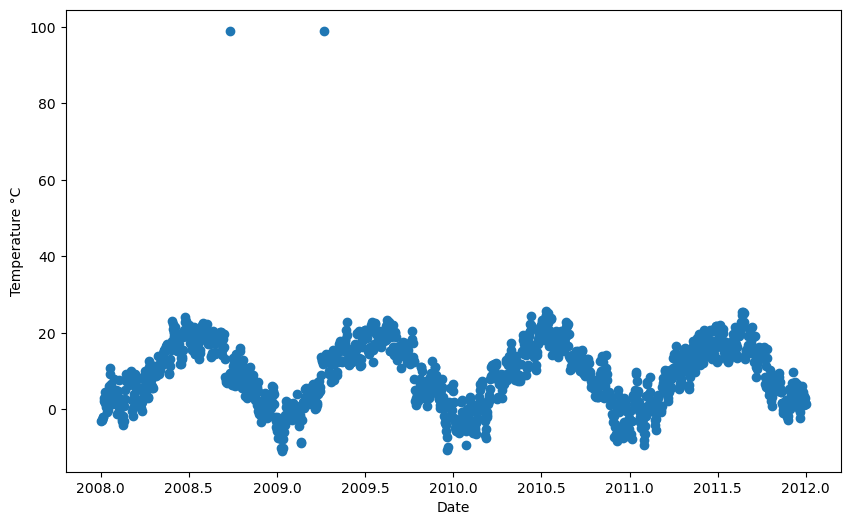

Best-fit values:
a: -9.988133689134516 b: 12.333023014196588 c: 9.38411486809072
Uncertainties:
a: 0.17961047334210886 b: 0.01798305242276112 c: 0.12700529122712614


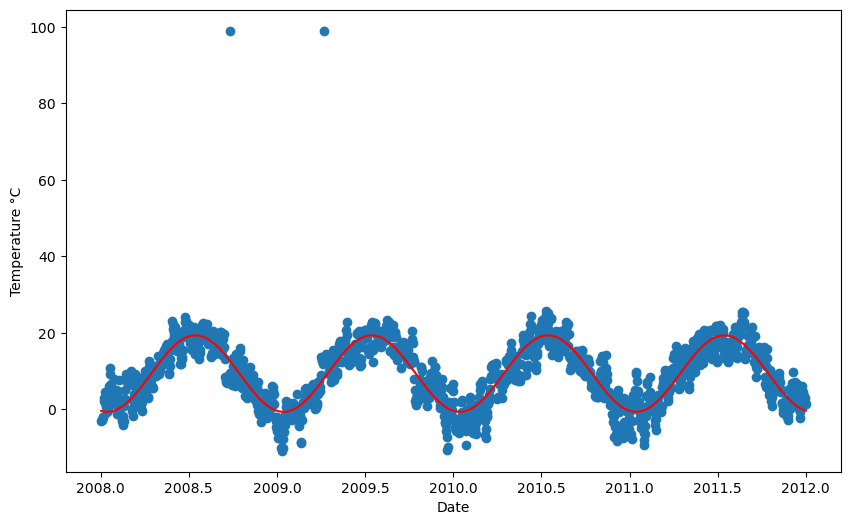

Min temperature expected: -0.6040167943949157
Max temperature expected: 19.372217151652045
b represent the phase of the function, if we change b the curve will translate right/left. In this case b aligned temperature to the months


In [8]:
from scipy.optimize import curve_fit

data = pd.read_csv("data/munich_temperatures_average_with_bad_data.txt", delimiter="\s+", header=None, names=["Date", "Temperature"])

start_date = 2008.00000
end_date = 2012.00000  

filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Date'], filtered_data['Temperature'])
plt.xlabel('Date')
plt.ylabel('Temperature °C')
plt.show()

def model_function(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

params, covariance = curve_fit(model_function, filtered_data['Date'], filtered_data['Temperature'])
a_fit, b_fit, c_fit = params
a_uncertainty, b_uncertainty, c_uncertainty = np.sqrt(np.diag(covariance))

print("Best-fit values:")
print("a:",a_fit, "b:", b_fit, "c:", c_fit)
print("Uncertainties:")
print("a:",a_uncertainty, "b:", b_uncertainty, "c:", c_uncertainty)


plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Date'], filtered_data['Temperature'])
plt.plot(filtered_data['Date'], model_function(filtered_data['Date'], a_fit, b_fit, c_fit), color='red')
plt.xlabel('Date')
plt.ylabel('Temperature °C')
plt.show()


# Calculate the overall average temperature
overall_average_temperature = np.mean(filtered_data['Temperature'])

t_values = np.linspace(2008.00000, 2012.00000, 1000) 
temperature_values = model_function(t_values, a_fit, b_fit, c_fit)

min_temperature = np.min(temperature_values)
max_temperature = np.max(temperature_values)

print("Min temperature expected:" ,min_temperature)
print("Max temperature expected:" ,max_temperature)

print("b represent the phase of the function, if we change b the curve will translate right/left. In this case b aligned temperature to the months")
